In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#defining
vocab_size = 10000
embedding_dim = 16
max_length = 10
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [3]:
#open the data file
with open ('./data/data.json', 'r', encoding="utf8") as f:
    datastore = json.load(f)
requests = []
labels = []
full = []

In [4]:
for item in datastore:
    requests.append(item['request'])
    parameters = [item['is_order'],item['is_refund'],item['is_status'],item['is_date_change'],item['is_dest_change'],item['is_weather'],item['is_allowed']]
    full.append(parameters)
    labels.append(parameters.index(1) + 1)

In [5]:
#split the data into training and testing
training_requests, testing_requests, training_labels, testing_labels = train_test_split(requests, labels, test_size=0.2, random_state=42)

In [6]:
#tokenizing
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_requests)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_requests)
training_padded = pad_sequences(training_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_requests)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

In [16]:
#model
model = LogisticRegression(max_iter=1000)
model.fit(training_padded, training_labels)
print(model.score(testing_padded, testing_labels))

0.5


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


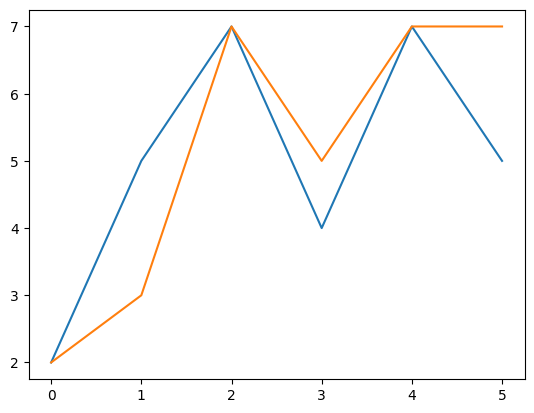

In [8]:
#plot the model
plt.plot(model.predict(testing_padded))
plt.plot(testing_labels)
plt.show()
